In [56]:
import pandas as pd 


In [53]:
df= pd.read_csv('Cardata.csv')

In [54]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [55]:
df.shape

(4340, 8)

In [5]:
print(df['seller_type'].unique())
print('/n')
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
/n
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [6]:
# Check missing or Null values

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
def converter(owner):
    if owner=='First Owner':
        return 1
    elif owner=='Second Owner':
        return 2
    elif owner=='Fourth & Above Owner' :
        return 4
    elif owner=='Third Owner':
        return 3
    else :
        return 0
 

In [10]:
df['Owner']=df['owner'].apply(converter)

In [11]:
df.head(100)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2
...,...,...,...,...,...,...,...,...,...
95,Fiat Avventura MULTIJET Emotion,2015,350000,53000,Diesel,Individual,Manual,Second Owner,2
96,Audi A8 4.2 TDI,2013,2800000,49000,Diesel,Dealer,Automatic,First Owner,1
97,Datsun RediGO 1.0 S,2017,210000,15000,Petrol,Dealer,Manual,Second Owner,2
98,Volkswagen Jetta 1.4 TSI Comfortline,2013,450000,50000,Petrol,Individual,Manual,First Owner,1


In [12]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Owner'],
      dtype='object')

In [13]:
final_data=df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'Owner']]

In [14]:
final_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,Owner
0,2007,60000,70000,Petrol,Individual,Manual,1
1,2007,135000,50000,Petrol,Individual,Manual,1
2,2012,600000,100000,Diesel,Individual,Manual,1
3,2017,250000,46000,Petrol,Individual,Manual,1
4,2014,450000,141000,Diesel,Individual,Manual,2


In [15]:
final_data['Current_year']=2020

<ipython-input-15-39a5c32c0824>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Current_year']=2020


In [16]:
final_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,Owner,Current_year
0,2007,60000,70000,Petrol,Individual,Manual,1,2020
1,2007,135000,50000,Petrol,Individual,Manual,1,2020
2,2012,600000,100000,Diesel,Individual,Manual,1,2020
3,2017,250000,46000,Petrol,Individual,Manual,1,2020
4,2014,450000,141000,Diesel,Individual,Manual,2,2020


In [17]:
final_data['No_year']=final_data['Current_year']-final_data['year']

In [18]:
final_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,Owner,Current_year,No_year
0,2007,60000,70000,Petrol,Individual,Manual,1,2020,13
1,2007,135000,50000,Petrol,Individual,Manual,1,2020,13
2,2012,600000,100000,Diesel,Individual,Manual,1,2020,8
3,2017,250000,46000,Petrol,Individual,Manual,1,2020,3
4,2014,450000,141000,Diesel,Individual,Manual,2,2020,6


In [19]:
final_data.drop(['Current_year'],axis=1,inplace=True)

In [20]:
final_data.drop(['year'],axis=1,inplace=True)

In [21]:
final_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,Owner,No_year
0,60000,70000,Petrol,Individual,Manual,1,13
1,135000,50000,Petrol,Individual,Manual,1,13
2,600000,100000,Diesel,Individual,Manual,1,8
3,250000,46000,Petrol,Individual,Manual,1,3
4,450000,141000,Diesel,Individual,Manual,2,6


In [22]:
## We write inplace= True so that it is a permamnent operation. 
## Now categorical columns need to be given some matematical value so that stats can be applied to them 
## for that we will import dummy values fro panda library and try to then complete our model


In [23]:
final_data=pd.get_dummies(final_data,drop_first=True)

In [24]:
final_data.head()

,selling_price,km_driven,Owner,No_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,60000,70000,1,13,0,0,0,1,1,0,1
1,135000,50000,1,13,0,0,0,1,1,0,1
2,600000,100000,1,8,1,0,0,0,1,0,1
3,250000,46000,1,3,0,0,0,1,1,0,1
4,450000,141000,2,6,1,0,0,0,1,0,1


In [25]:
final_data.corr()

,selling_price,km_driven,Owner,No_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
selling_price,1.000000,-0.192289,-0.228091,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205
km_driven,-0.192289,1.000000,0.321848,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226
Owner,-0.228091,0.321848,1.000000,0.468678,-0.002201,0.011789,0.029943,-0.008409,0.265812,-0.088840,0.083226
No_year,-0.413922,0.419688,0.468678,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800
fuel_Diesel,0.282947,0.285396,-0.002201,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098
fuel_Electric,-0.005095,-0.001372,0.011789,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746
fuel_LPG,-0.042434,0.036652,0.029943,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764
fuel_Petrol,-0.269453,-0.291139,-0.008409,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614
seller_type_Individual,-0.236798,0.182663,0.265812,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.088840,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346


In [26]:
import seaborn as sns

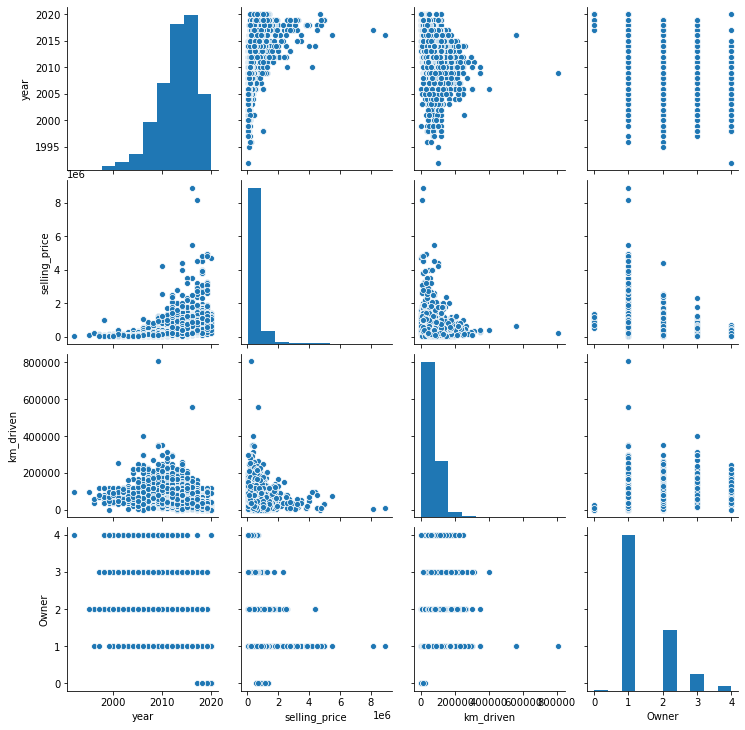

In [27]:
sns.pairplot(df)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

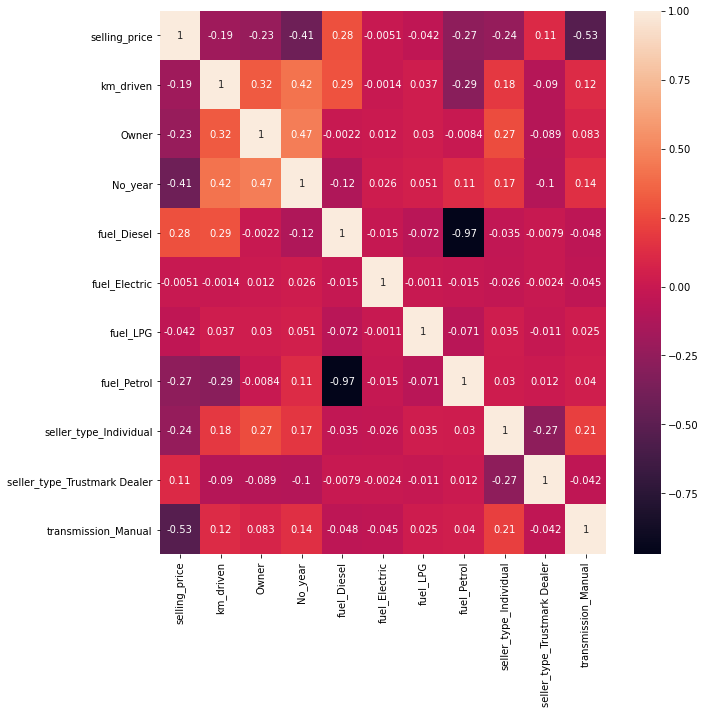

In [29]:
cormat=final_data.corr()
top_corr_features=cormat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(final_data[top_corr_features].corr(),annot=True)

In [30]:
final_data.head(5)

,selling_price,km_driven,Owner,No_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,60000,70000,1,13,0,0,0,1,1,0,1
1,135000,50000,1,13,0,0,0,1,1,0,1
2,600000,100000,1,8,1,0,0,0,1,0,1
3,250000,46000,1,3,0,0,0,1,1,0,1
4,450000,141000,2,6,1,0,0,0,1,0,1


In [31]:
X=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

In [32]:
X.head()

,km_driven,Owner,No_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,70000,1,13,0,0,0,1,1,0,1
1,50000,1,13,0,0,0,1,1,0,1
2,100000,1,8,1,0,0,0,1,0,1
3,46000,1,3,0,0,0,1,1,0,1
4,141000,2,6,1,0,0,0,1,0,1


In [33]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [35]:
print(model.feature_importances_)

[2.49412959e-01 2.85497037e-02 2.47281486e-01 1.29964405e-01
 2.29352945e-05 2.44904852e-05 2.21199817e-04 4.34547729e-02
 8.23613306e-03 2.92831915e-01]


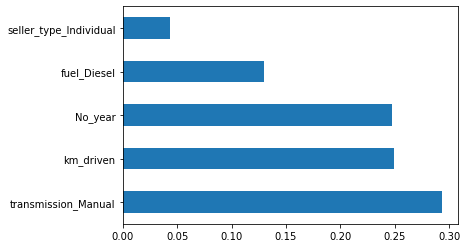

In [36]:
feat_importances= pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
X_train.shape

(3472, 10)

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_random= RandomForestRegressor()

In [40]:
## Hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [41]:
# Randomize Search CV
# No of trees in random forest 
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at every split
max_features =['auto','sqrt']
#Maximum number of level in tree 
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
# Create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features': max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf': min_samples_leaf}
print(random_grid) 

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
#Use the random grid to search foer the best hyperparameters
# First create the base modelto tune 
rf=RandomForestRegressor()

In [45]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [46]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
predictions=rf_random.predict(X_test)

In [48]:
predictions

array([ 928147.89032163,  420215.23027444,  764108.38938318,
        132284.96592414,  558268.15419429,  220579.09734139,
        100978.00720442,  558596.59998817,  314237.18572962,
        412367.35811743,  122040.00919533,  219589.74707395,
        698490.16990874,  367656.52818287,  477956.72779649,
        321114.98597189,  176573.81753274,  726955.51940796,
        991299.81237835,  104954.77433353,  168329.71294814,
        506572.05492973,  528855.14453808,  258419.34869762,
        349778.81326202,  134808.90911722,  554857.77095092,
        829174.15340806,  120677.04478179,  249334.44950712,
        856847.68800744,  953639.1257655 ,  618491.87197692,
        393346.68982229,  708525.75074513,  655519.12129052,
        506572.05492973,  781868.53646649,  233627.27601968,
        254062.96254927,  814892.7929234 ,  284708.16075674,
        391301.37873083,  323168.55181595,  699968.32388162,
        193452.32894802,  110057.03912537,  103783.94775804,
        403962.67323122,

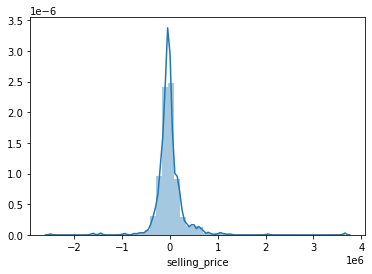

In [49]:
sns.distplot(y_test-predictions)

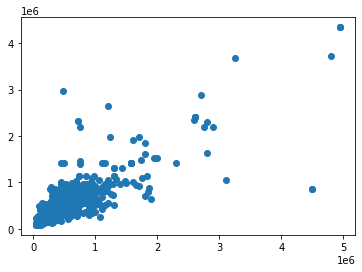

In [57]:
plt.scatter(y_test,predictions)

In [59]:
import pickle
#open a file,where you ant to store the data 
file=open('random_forest_regression_model.pkl','wb')
#dump information to that file
pickle.dump(rf_random,file)